# Exploring Game: 2016-01-01 CHA @ TOR
<font size="4">Edie Espejo, 2017-05-01</font>

In [1]:
# LIBRARIES
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DISPLAY PLOTS INLINE
%matplotlib inline

# MAKE 'EM PLOTS BIG
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
# LOAD IN DATA
game_df = pd.read_csv("01.01.2016.CHA.at.TOR_0021500492.csv")
player_shot = pd.read_csv("playershotsdf.csv")

In [3]:
game_df.head(3)

,qtr,stamp,time,clock,x,y,z
0,1.0,1.451695e+12,711.26,11.99,23.42540,45.12734,3.64299
1,1.0,1.451695e+12,711.22,11.97,24.00450,44.68890,2.99994
2,1.0,1.451695e+12,711.18,11.95,24.62517,44.30089,2.24555


In [4]:
player_shot.head(3)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,21500002,84.0,201166.0,Aaron Brooks,1.610613e+09,Chicago Bulls,1.0,3.0,35.0,...,Left Side(L),8-16 ft.,15.0,-145.0,67.0,1.0,0.0,20151027,CHI,CLE
1,Shot Chart Detail,21500002,201.0,201166.0,Aaron Brooks,1.610613e+09,Chicago Bulls,2.0,7.0,47.0,...,Center(C),Less Than 8 ft.,5.0,50.0,26.0,1.0,1.0,20151027,CHI,CLE
2,Shot Chart Detail,21500002,360.0,201166.0,Aaron Brooks,1.610613e+09,Chicago Bulls,3.0,4.0,59.0,...,Right Side(R),8-16 ft.,11.0,114.0,-6.0,1.0,1.0,20151027,CHI,CLE


In [5]:
# FIND THIS GAME IN PLAYER_SHOT
this_game = player_shot.loc[player_shot["GAME_ID"]==21500492]

In [6]:
this_game.head(3)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
9061,Shot Chart Detail,21500492,175.0,202687.0,Bismack Biyombo,1.610613e+09,Toronto Raptors,2.0,7.0,5.0,...,Center(C),Less Than 8 ft.,0.0,0.0,1.0,1.0,1.0,20160101,TOR,CHA
9062,Shot Chart Detail,21500492,372.0,202687.0,Bismack Biyombo,1.610613e+09,Toronto Raptors,3.0,2.0,34.0,...,Center(C),Less Than 8 ft.,2.0,-9.0,23.0,1.0,0.0,20160101,TOR,CHA
9063,Shot Chart Detail,21500492,439.0,202687.0,Bismack Biyombo,1.610613e+09,Toronto Raptors,4.0,9.0,6.0,...,Center(C),Less Than 8 ft.,1.0,-4.0,16.0,1.0,1.0,20160101,TOR,CHA


In [7]:
# DATA ABOUT ATTEMPTED SHOTS
attempted_shots = this_game[(this_game["PERIOD"]==2)&(this_game["SHOT_ATTEMPTED_FLAG"]==1.0)]
attempted_shots.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
9061,Shot Chart Detail,21500492,175.0,202687.0,Bismack Biyombo,1.610613e+09,Toronto Raptors,2.0,7.0,5.0,...,Center(C),Less Than 8 ft.,0.0,0.0,1.0,1.0,1.0,20160101,TOR,CHA
12005,Shot Chart Detail,21500492,153.0,203148.0,Brian Roberts,1.610613e+09,Charlotte Hornets,2.0,9.0,29.0,...,Center(C),8-16 ft.,8.0,24.0,80.0,1.0,1.0,20160101,TOR,CHA
18441,Shot Chart Detail,21500492,154.0,202709.0,Cory Joseph,1.610613e+09,Toronto Raptors,2.0,9.0,19.0,...,Center(C),Less Than 8 ft.,1.0,14.0,7.0,1.0,1.0,20160101,TOR,CHA
18442,Shot Chart Detail,21500492,161.0,202709.0,Cory Joseph,1.610613e+09,Toronto Raptors,2.0,8.0,45.0,...,Right Side Center(RC),16-24 ft.,18.0,86.0,169.0,1.0,1.0,20160101,TOR,CHA
23276,Shot Chart Detail,21500492,185.0,201942.0,DeMar DeRozan,1.610613e+09,Toronto Raptors,2.0,6.0,30.0,...,Center(C),16-24 ft.,19.0,51.0,188.0,1.0,1.0,20160101,TOR,CHA


In [8]:
teams = attempted_shots["TEAM_NAME"]
colors = []
for entry in teams:
    if entry == "Toronto Raptors":
        colors.append("red")
    else:
        colors.append("blue")

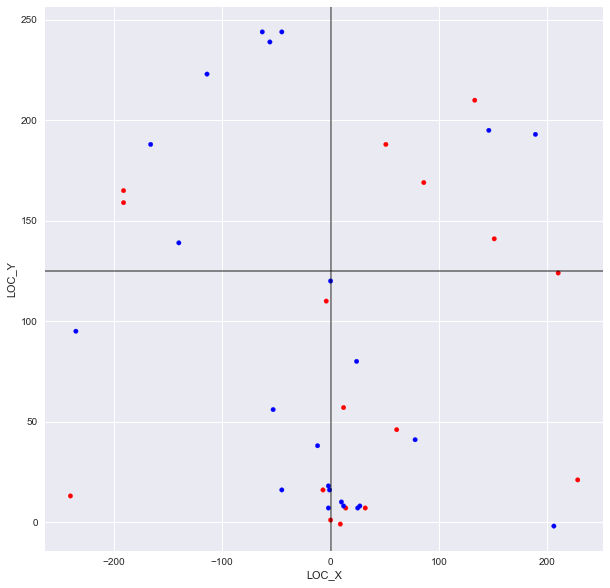

In [9]:
# ATTEMPTED SHOT PLAYER POSITIONS IN SECOND QUARTER
attempted_shots.plot(x="LOC_X", y="LOC_Y", kind="scatter", alpha=1, c=colors)
plt.axvline(0, color="k", alpha=0.5)
plt.axhline(250/2, color="k", alpha=0.5)

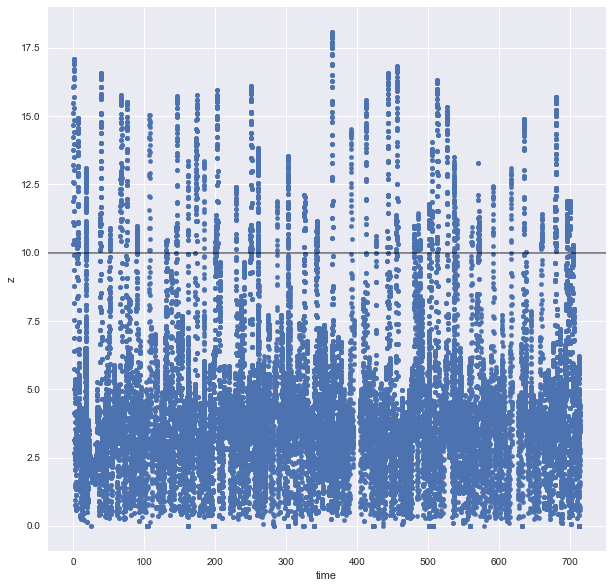

In [10]:
# TIME SERIES OF SECOND QUARTER
game_df[game_df["qtr"]==2].plot(x="time", y="z", kind="scatter", alpha=1)
plt.axhline(10, color="k", alpha=0.5)

In [11]:
# PLAYERS IN THIS GAME
this_game[this_game["PERIOD"]==2]["PLAYER_NAME"].values

array(['Bismack Biyombo', 'Brian Roberts', 'Cory Joseph', 'Cory Joseph',
       'DeMar DeRozan', 'DeMar DeRozan', 'DeMar DeRozan',
       'DeMarre Carroll', 'DeMarre Carroll', 'Frank Kaminsky',
       'Frank Kaminsky', 'Frank Kaminsky', 'Frank Kaminsky',
       'Frank Kaminsky', 'Jeremy Lamb', 'Jeremy Lamb', 'Jeremy Lamb',
       'Jonas Valanciunas', 'Kemba Walker', 'Kemba Walker', 'Kemba Walker',
       'Kemba Walker', 'Kemba Walker', 'Kyle Lowry', 'Kyle Lowry',
       'Kyle Lowry', 'Kyle Lowry', 'Kyle Lowry', 'Luis Scola',
       'Marvin Williams', 'Marvin Williams', 'Marvin Williams',
       'Nicolas Batum', 'Nicolas Batum', 'Patrick Patterson',
       'Patrick Patterson', 'Tyler Hansbrough', 'Tyler Hansbrough',
       'Tyler Hansbrough', 'Tyler Hansbrough'], dtype=object)

In [68]:
# FIND THE TIMES WHERE BALL GOES OVER 10 FEET
game_df[(game_df["qtr"]==2) & game_df["z"]>=10]

,qtr,stamp,time,clock,x,y,z


In [69]:
np.max(game_df["z"])

18.073550000000001

In [70]:
q2z = game_df[(game_df["qtr"]==2)]["z"]

In [53]:
len(q2z<10)

47639

In [52]:
len(q2z>=10)

47639

In [78]:
game_df["above10"] = game_df["z"]>10

In [79]:
game_df.head()

,qtr,stamp,time,clock,x,y,z,above10
0,1.0,1.451695e+12,711.26,11.99,23.42540,45.12734,3.64299,False
1,1.0,1.451695e+12,711.22,11.97,24.00450,44.68890,2.99994,False
2,1.0,1.451695e+12,711.18,11.95,24.62517,44.30089,2.24555,False
3,1.0,1.451695e+12,711.14,11.92,25.25442,43.77936,1.49041,False
4,1.0,1.451695e+12,711.10,11.90,25.70257,43.44658,0.50661,False


In [81]:
above10s = game_df.loc[game_df["above10"]==True]

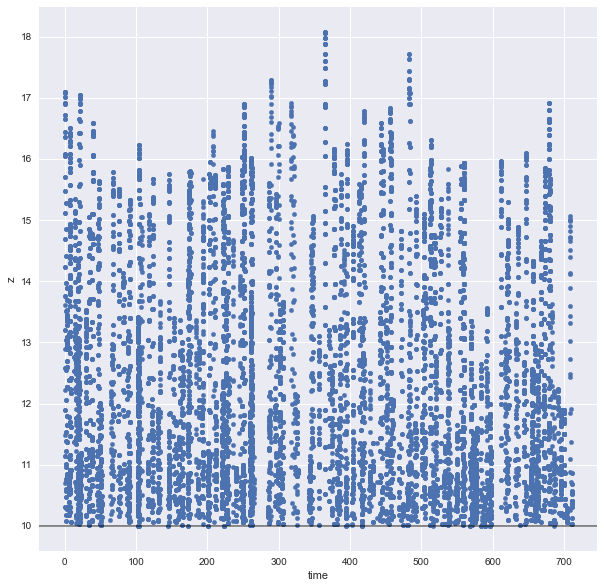

In [91]:
above10s.plot(x="time", y="z", kind="scatter", alpha=1)
plt.axhline(10, color="k", alpha=0.5)

In [98]:
sorted_q2 = game_df[game_df["qtr"]==2].sort_values(by="time", ascending=True)

In [112]:
sorted_q2= sorted_q2.reset_index(drop=True)

In [145]:
i=0
while sorted_q2["above10"][i]==True:
    i=i+1
    
print(i)

70


In [141]:
lol = pd.DataFrame([sorted_q2["time"][0:70], sorted_q2["z"][0:70]]).T

In [142]:
lol

,time,z
0,0.01,10.31036
1,0.01,10.31036
2,0.05,11.13910
3,0.05,11.13910
4,0.09,11.89159
5,0.09,11.89159
6,0.13,12.57493
7,0.13,12.57493
8,0.17,13.19625
9,0.17,13.19625


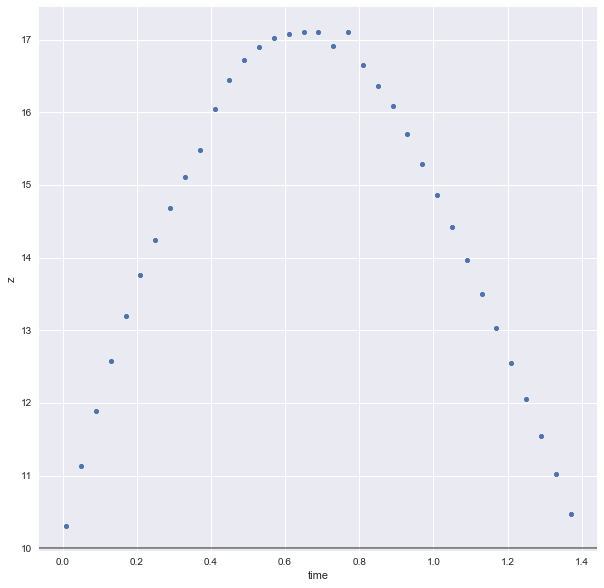

In [143]:
lol.plot(x="time", y="z", kind="scatter", alpha=1)
plt.axhline(10, color="k", alpha=0.5)